# Tarea 1 - Métodos de Gran Escala

## Blanca García 000118886

### OBJETIVO
Modelo en Python que permite estimar el precio de una casa dadas algunas características que el usuario deberá proporcionar a través de un front al momento de la inferencia.

### DATOS
Se ocupará una base de datos que describa los aspectos de las viviendas residenciales en Ames, Iowa para poder predecir el precio final de cada vivienda.

La base contiene 80 variables descritas a continuación:
* ID: Identifier
* SalePrice: the property's sale price in dollars. This is the target variable to predict
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale



### Carga de paqueterías y lectura de datos

In [38]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import IterativeImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.compose import ColumnTransformer

In [39]:
data_train = pd.read_csv("train.csv")
print("El shape del dataset TRAIN es {}".format(data_train.shape))

data_test = pd.read_csv("test.csv")
print("El shape del dataset TEST es {}".format(data_test.shape))

El shape del dataset TRAIN es (1460, 81)
El shape del dataset TEST es (1459, 80)


In [40]:
#Observamos los primeros registros de los datasets
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [41]:
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### EDA

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 900x800 with 0 Axes>

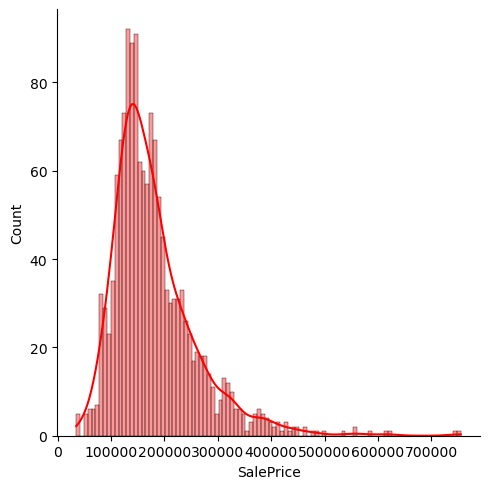

In [42]:
# Vemos como se distribuye la variable SalePrice
print(data_train['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.displot(data_train['SalePrice'], color='r', bins=100, kde=True, alpha=0.4)
plt.show

Podemos observar que las casas tienen mayor concentracion entre precios 100,000 y 300,000.

In [43]:
# Vemos como se distribuyen las variables numéricas.
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [44]:
# Y hacemos una lista para poder seleccionar sólo las numéricas, las guardamos en datanum.
list(set(data_train.dtypes.tolist()))
var_num = data_train.select_dtypes(include = ['float64', 'int64'])
var_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


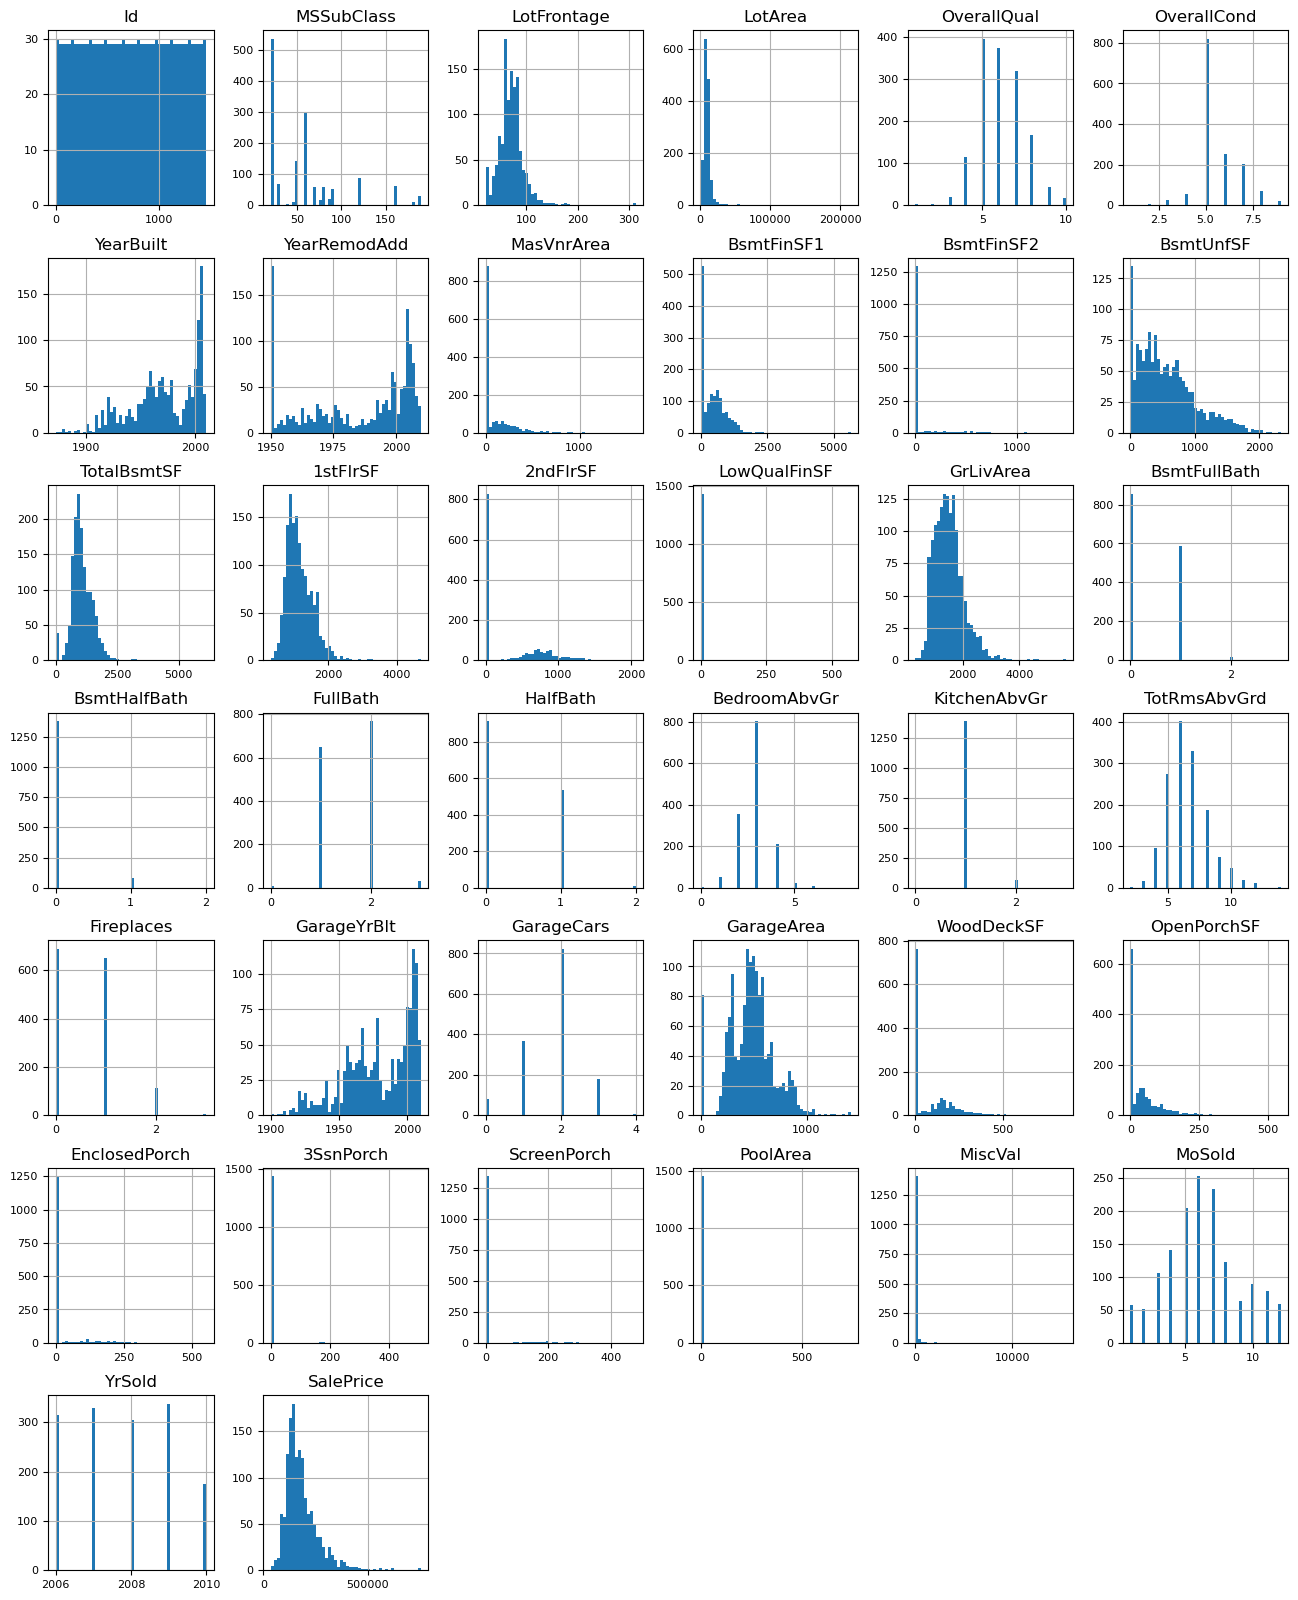

In [45]:
# Graficamos cómo se distribuyen las variables numéricas
var_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

Con estas gráficamos podemos observar en un inicio que las variables que más nos aportarán pueden ser: LotFrontage, OverallQual, 
TotalBsmtSF, GrLivArea, GarageArea.

Ahora analizaremos un mapa de calor de la correlación entre las variables numéricas:

<Axes: >

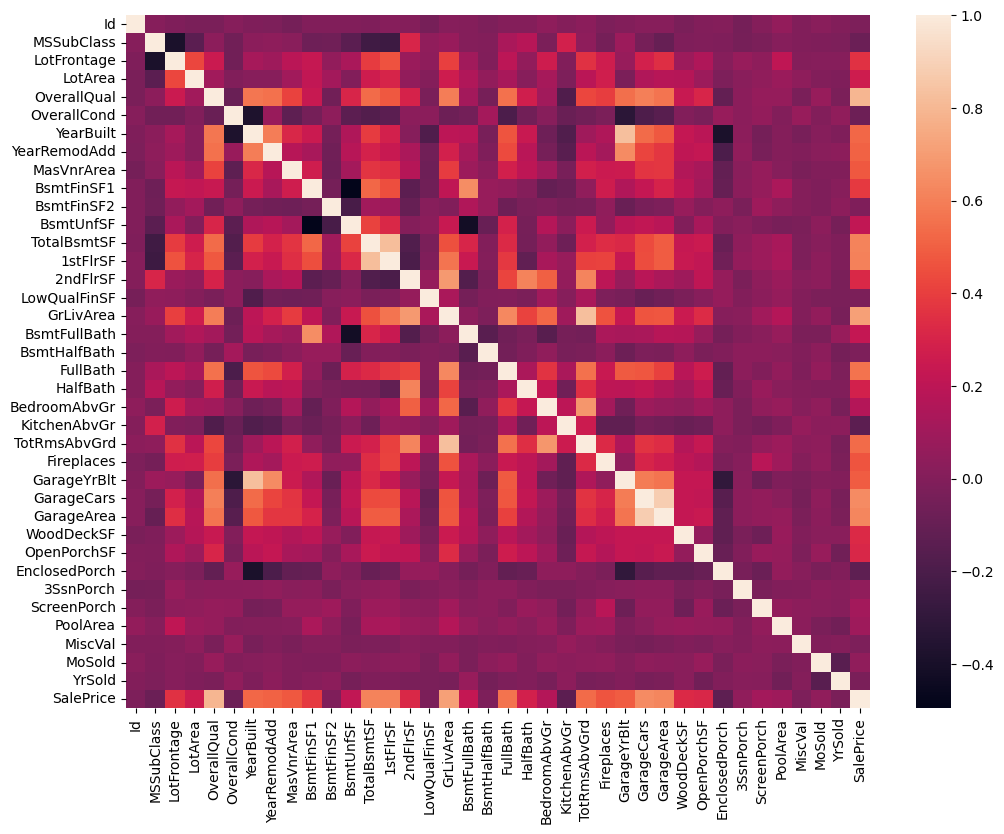

In [46]:
plt.subplots(figsize=(12,9))
sns.heatmap(var_num.corr())

In [47]:
# Analizamos las 10 variables más correlacionadas con SalePrice
correl_var = var_num.corr()['SalePrice']
correl_var = correl_var[:10]
correl_var

Id             -0.021917
MSSubClass     -0.084284
LotFrontage     0.351799
LotArea         0.263843
OverallQual     0.790982
OverallCond    -0.077856
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

Ya que nos dimos una idea de las variables que nos aportan más información procedemos a definir con qué variables correremos nuestro Modelo de predicción.

Para esto uniremos las dos datasets, train y test de un inicio para tener más registros.

In [48]:
# Quitamos las variables de ID
train_sin_ID = data_train.drop('Id', axis=1)
train_sin_ID.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [49]:
test_sin_ID = data_test.drop('Id', axis=1)
test_sin_ID.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [50]:
# unimos las bases para tener más registros
data_total = pd.concat([train_sin_ID, test_sin_ID], axis = 0)
print("El shape del dataset con las dos bases unidas es {}".format(data_total.shape))

El shape del dataset con las dos bases unidas es (2919, 80)


In [51]:
# se cuentan los missings por variables para saber cuales tienen más missings y quedarnos con las que casi no tengan
data_total.isnull().sum().sort_values(ascending = False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
                ... 
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
CentralAir         0
Length: 80, dtype: int64

In [52]:
# Quitamos las 5 variables con más missings: PoolQC, MiscFeature, Alley, Fence, FireplaceQu
var_sin_miss = data_total.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis = 1)

In [53]:
#para el modelo nos quedaremos solo con las numéricas, que son 37 variables:
var_modelo = var_sin_miss.select_dtypes(include = ['float64', 'int64'])
var_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   LotFrontage    2433 non-null   float64
 2   LotArea        2919 non-null   int64  
 3   OverallQual    2919 non-null   int64  
 4   OverallCond    2919 non-null   int64  
 5   YearBuilt      2919 non-null   int64  
 6   YearRemodAdd   2919 non-null   int64  
 7   MasVnrArea     2896 non-null   float64
 8   BsmtFinSF1     2918 non-null   float64
 9   BsmtFinSF2     2918 non-null   float64
 10  BsmtUnfSF      2918 non-null   float64
 11  TotalBsmtSF    2918 non-null   float64
 12  1stFlrSF       2919 non-null   int64  
 13  2ndFlrSF       2919 non-null   int64  
 14  LowQualFinSF   2919 non-null   int64  
 15  GrLivArea      2919 non-null   int64  
 16  BsmtFullBath   2917 non-null   float64
 17  BsmtHalfBath   2917 non-null   float64
 18  FullBath

In [54]:
missingdata = var_modelo.isnull().sum()[var_modelo.isnull().sum() > 0].index.tolist()
var_modelo[missingdata].head()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea,SalePrice
0,65.0,196.0,706.0,0.0,150.0,856.0,1.0,0.0,2003.0,2.0,548.0,208500.0
1,80.0,0.0,978.0,0.0,284.0,1262.0,0.0,1.0,1976.0,2.0,460.0,181500.0
2,68.0,162.0,486.0,0.0,434.0,920.0,1.0,0.0,2001.0,2.0,608.0,223500.0
3,60.0,0.0,216.0,0.0,540.0,756.0,1.0,0.0,1998.0,3.0,642.0,140000.0
4,84.0,350.0,655.0,0.0,490.0,1145.0,1.0,0.0,2000.0,3.0,836.0,250000.0


In [55]:
bool_cols = []

numeric_cols = ['MSSubClass',
'LotFrontage',
'LotArea',
'OverallQual',
'OverallCond',
'YearBuilt',
'YearRemodAdd',
'MasVnrArea',
'BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'1stFlrSF',
'2ndFlrSF',
'LowQualFinSF',
'GrLivArea',
'BsmtFullBath',
'BsmtHalfBath',
'FullBath',
'HalfBath',
'BedroomAbvGr',
'KitchenAbvGr',
'TotRmsAbvGrd',
'Fireplaces',
'GarageYrBlt',
'GarageCars',
'GarageArea',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea',
'MiscVal',
'MoSold',
'YrSold',
'SalePrice']

In [56]:
# Se eliminaran filas y columas duplicadas
var_modelo = var_modelo.drop_duplicates()
var_modelo = var_modelo.reset_index(drop = True)

In [57]:
# Completamos las variables vacías usando un imputador (apoyándonos del código
# "https://www.kaggle.com/code/muhammadibrahimqasmi/predicting-house-prices")

def impute_continuous_missing_data(passed_col):
    df_null = var_modelo[var_modelo[passed_col].isnull()]
    df_not_null = var_modelo[var_modelo[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missingdata if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state = 123), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 123)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [58]:
# Se revisan los valores vacíos
var_modelo.isnull().sum()[var_modelo.isnull().sum() > 0].sort_values(ascending = False)

SalePrice       1459
LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtFullBath       2
BsmtHalfBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageCars         1
GarageArea         1
dtype: int64

In [59]:
import warnings
warnings.filterwarnings('ignore')

# Imputamos informacioón en valores vacíos con nuestras funciones
for col in missingdata:
    print("Missing Values", col, ":", str(round((var_modelo[col].isnull().sum() / len(var_modelo)) * 100, 2))+"%")
    if col in numeric_cols:
        var_modelo[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values LotFrontage : 16.65%
MAE = 9.480472279260779 

RMSE = 14.949293082116988 

R2 = 0.5261474443189726 

Missing Values MasVnrArea : 0.79%
MAE = 82.35336206896551 

RMSE = 139.52579854080133 

R2 = 0.4090942293741048 

Missing Values BsmtFinSF1 : 0.03%
MAE = 43.92506849315068 

RMSE = 145.03560548201344 

R2 = 0.9197358751723536 

Missing Values BsmtFinSF2 : 0.03%
MAE = 29.475565068493157 

RMSE = 74.07348898245746 

R2 = 0.8231574160016043 

Missing Values BsmtUnfSF : 0.03%
MAE = 30.042089041095892 

RMSE = 70.85002564988274 

R2 = 0.9734809494362616 

Missing Values TotalBsmtSF : 0.03%
MAE = 72.88148972602741 

RMSE = 176.14017063249713 

R2 = 0.8647603876708448 

Missing Values BsmtFullBath : 0.07%
MAE = 0.20243150684931507 

RMSE = 0.32260497919706654 

R2 = 0.6183655943574746 

Missing Values BsmtHalfBath : 0.07%
MAE = 0.08184931506849315 

RMSE = 0.2157798853093346 

R2 = 0.27542004015331256 

Missing Values GarageYrBlt : 5.45%
MAE = 5.078242753623185 

RMSE = 14.23275

In [60]:
# Verificamos que todos los valores vacíos se hayan imputado
var_modelo.isnull().sum().sort_values(ascending = False)

MSSubClass       0
HalfBath         0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
BedroomAbvGr     0
FullBath         0
LotFrontage      0
BsmtHalfBath     0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
SalePrice        0
dtype: int64

In [61]:
# Hacemos un análisis descrptivo de las variables ya sin nulos
descrip = var_modelo.describe(include='all')
descrip.T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.00,70.00,190.0
LotFrontage,2919.0,70.185211,22.563073,21.0,60.0,70.00,80.76,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.00,11570.00,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.00,7.00,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.00,6.00,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.00,2001.00,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.00,2004.00,2010.0
MasVnrArea,2919.0,102.549181,178.875027,0.0,0.0,0.00,164.50,1600.0
BsmtFinSF1,2919.0,441.404464,455.533879,0.0,0.0,369.00,733.00,5644.0
BsmtFinSF2,2919.0,49.583217,169.176623,0.0,0.0,0.00,0.00,1526.0


In [62]:
# De acuerdo a los análisis de variables anteriores, podemos elegir las 8 variables que más correlación y aporte de información
# tengan para el modelo
datafinal = var_modelo[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'LotFrontage', 
                      'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'SalePrice']]

## Entrenamiendo del MODELO

In [63]:
# Entrenamos el modelo 
# Seleccionar características numéricas y eliminar 'SalePrice'
numerical_cols = datafinal.select_dtypes(include=['int64', 'float64']).drop('SalePrice', axis=1).columns
numerical_transformer = StandardScaler()

# Crear ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols)
    ])

# Modelos
model_list = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor()
}

# División de la base de datos
x = datafinal.drop('SalePrice', axis=1)
y = datafinal['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

# Crear pipelines
pipelines = {name: Pipeline(steps=[('preprocessor', preprocessor), ('model', model)]) for name, model in model_list.items()}

# Entrenamiento y evaluación de los modelos
rmse_results = {}

for name, pipeline in pipelines.items():
    pipeline.fit(x_train, y_train)
    predictions = pipeline.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_results[name] = rmse

# Mostrar los RMSE resultantes
rmse_results_sorted = dict(sorted(rmse_results.items(), key=lambda item: item[1]))
print(rmse_results_sorted)

{'Random Forest Regression': 22084.56138233369, 'Linear Regression': 28440.282194982625}


Con esto vemos que de los dos modelos usados el que menor error tiene es el Random Forest Regression, por lo que se hará la predicción con el.

In [64]:
datafinal

,OverallQual,YearBuilt,YearRemodAdd,LotFrontage,TotalBsmtSF,GrLivArea,GarageArea,SalePrice
0,7,2003,2003,65.0,856.0,1710,548.0,208500.00
1,6,1976,1976,80.0,1262.0,1262,460.0,181500.00
2,7,2001,2002,68.0,920.0,1786,608.0,223500.00
3,7,1915,1970,60.0,756.0,1717,642.0,140000.00
4,8,2000,2000,84.0,1145.0,2198,836.0,250000.00
...,...,...,...,...,...,...,...,...
2914,4,1970,1970,21.0,546.0,1092,0.0,86155.00
2915,4,1970,1970,21.0,546.0,1092,286.0,86124.00
2916,5,1960,1996,160.0,1224.0,1224,576.0,163890.50
2917,5,1992,1992,62.0,912.0,970,0.0,115667.25


In [65]:
# Se dividen las bases
df_train, df_test = train_test_split(datafinal, test_size=0.2, random_state=42)

x_train = df_train.drop(['SalePrice'], axis = 1)
y_train = df_train['SalePrice']  

# Se entrena con el XGBoost Regressor
RFR_model = RandomForestRegressor()
RFR_model.fit(x_train, y_train)

# Se hace la predicción en la base test usando el modelo entrenado
y_pred = RFR_model.predict(df_test.drop(['SalePrice'], axis = 1))

joblib.dump(RFR_model, "./rfr_model.joblib")

['./rfr_model.joblib']

### Predicción con entrada de datos de usuario

In [66]:
# Definir las variables necesarias para la predicción
variables = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'LotFrontage','TotalBsmtSF', 'GrLivArea', 'GarageArea']
locale.setlocale(locale.LC_ALL, '')

# Solicitar al usuario ingresar las variables de entrada
print("Ingrese los valores de las variables para predecir el precio de la casa:")
ov = input("OverallQual - Calidad general de materiales y acabados (valor entre 1 y 10): ")
yearB = input("YearBuilt - Año en que se construyó: ")
yearRemo = input("YearRemoAdd - Año en que se remodeló (si no ha tenido entonces es igual al de construcción): ")
LT = float(input("LotFrontage - Tamaño en pies cuadrados de la entrada a la calle: "))
TotalB = float(input("TotalBsmtSF - Tamaño en pies cuadrados del sótano: "))
GrL = float(input("GrLivArea - Tamaño en pies cuadrados de la superficie habitable: "))
GarArea = float(input("GarageArea - Tamaño en pies cuadrados de la cochera: "))
             
user_input = pd.DataFrame({
    'OverallQual': [ov],
    'YearBuilt': [yearB],
    'YearRemodAdd': [yearRemo],
    'LotFrontage': [LT],
    'TotalBsmtSF': [TotalB],
    'GrLivArea': [GrL],
    'GarageArea': [GarArea]
})

# Crear un df de la info a calcular
input_data = pd.DataFrame(user_input, columns = variables)

# Cargar el modelo previamente entrenado
loaded_rfr = joblib.load("./rfr_model.joblib")

# Resultado del modelo
prediction = loaded_rfr.predict(input_data)
prediction_formateada = locale.currency(prediction[0], grouping=True)

# La predicción es:
print(f'El precio estimado de la casa es: {prediction_formateada}')

Ingrese los valores de las variables para predecir el precio de la casa:
OverallQual - Calidad general de materiales y acabados (valor entre 1 y 10): 5
YearBuilt - Año en que se construyó: 1999
YearRemoAdd - Año en que se remodeló (si no ha tenido entonces es igual al de construcción): 1999
LotFrontage - Tamaño en pies cuadrados de la entrada a la calle: 500
TotalBsmtSF - Tamaño en pies cuadrados del sótano: 50
GrLivArea - Tamaño en pies cuadrados de la superficie habitable: 500
GarageArea - Tamaño en pies cuadrados de la cochera: 40
El precio estimado de la casa es: $111,745.02
